In [21]:
'''Uplifting Emotions: optimistic, happy, joyous, powerful, euphoric, amiable, peaceful, uplifting, positive, cheerful, warm

Pessimistic Emotions: melancholy, harsh, somber, gritty, tragic, nihilistic, bleak, negative, ominous, bitter, desperate,
gloomy, grim, cold, lazy, weary, anxious, 

Romantic Emotions: sensual, erotic, yearning, tender, delicate, romantic, sweet, intimate

Playful Emotions: comic, carefree, whimsical, child-like, humorous, silly, reckless, innocent

Spiritual Emotions: sacred, mystical, meditative, enigmatic, atmospheric, ethereal, spiritual

Introspective Emotions: introspective, narrative, thoughtful

Dramatic Emotions: dramatic, theatrical, confrontational, menacing, visceral, bombastic, rowdy, 

Intense Emotions: intense, fiery, strong, aggressive, driving, intense, technical, explosive, fierce, rebellious

Nostalgic Emotions: nostalgic, wistful, sad, reflective

Dark Emotions: dark, eerie, macabre, eerie, demonic, unsettling, apocalyptic, halloween, brooding

Lively Emotions: lively, freewheeling, rollicking, raucous, exciting, hyper, energetic, lively, rousing, bravado

Calm Emotions: soothing, calm, gentle, peaceful, relaxing,  quiet, serene, mellow,laid-back, good-natured, soft, light, reassuring, mellow

Sophisticated Emotions: sophisticated, elegant, refined, literate

Whimsical Emotions: quirky, eccentric, playful, whimsical, dreamy, perky

Sarcastic Emotions: ironic, sarcastic, sardonic, satirical, 

Atmospheric: dreamy, hypnotic, lush, spacey, eerie, spooky, shimmering, sprawling, trippy

Energetic: rousing, rowdy, frenetic, manic, explosive, exuberant

Naturalistic: flowing, earthy, autumnal, pastoral, rustic, organic, warm, sunny, nothurnal, flowing, earthy

Sensual: sexual, sweet, exotic, sleek, sexy, sultry, sleazy

Philosophical: philosophical, cerebral, searching, ambitious, elaborate, profound

Emotional: sentimental, self-conscious, reassuring, plaintive, melancholy, melancholic, wistful, nostalgic, yearning, heartfelt, poignant, bittersweet, earnest, passionate, angry, defiant, anxious, scary, nervous
Dissonant: Fractured, broken, discordant, shattered 

Angry: Harsh, gritty, fierce, aggressive, tense, confrontational, menacing, visceral, angry, defiant, desperate, bitter 

Delicate: Precious, delicate, tender, pure, innocent, naive 

Melancholic: melancholy, somber, sad, plaintive, tragic, bleak, ominous, lonely, bitter

Humorous: comic, playful, humorous, satirical, whimsical, silly, humorous, ironic

Soothing: soothing, gentle, peaceful, reassuring, calming, soothing, relaxing, soft, tender

Reflective: introspective, meditative, philosophical, thoughtful, introspective, narrative, self-conscious, searching, wry, reflective

'''



'''

'''

'\n\n'

\begin{lstlisting}[language=Python]
with torch.no_grad():
for i, data in tqdm(enumerate(full_loader, 0)):
# put data on gpu
ids = data['ids'].to(device, dtype=torch.long)
mask = data['mask'].to(device, dtype=torch.long)
token_type_ids = data['token_type_ids'].to(device, dtype=torch.long)
targets = data['targets'].to(device, dtype=torch.float)
outputs = model.l1(ids, attention_mask=mask, token_type_ids=token_type_ids)
cls_embeddings = outputs[0][:, 0, :]
all_cls_embeddings[i*train_batch_size:(i+1)*train_batch_size, :] = cls_embeddings
\end{lstlisting}


In [22]:
#import y_label_reduced

import pandas as pd
import numpy as np

#import y_label_reduced
y_label_reduced = pd.read_csv('y_labels.csv')

In [23]:
labels = y_label_reduced.columns
label_less_than_20 = []
for label in labels:
    if(y_label_reduced[label].sum() < 20):
        print(label)
        label_less_than_20.append(label)

y_label_reduced = y_label_reduced.drop(label_less_than_20, axis=1)

irreverent
hostile
narcotic
suffocating
austere
effervescent
uncompromising
jovial
thuggish
resolute
boisterous
reserved
understated
restrained
snide
threatening
springlike
devotional
athletic
ramshackle
brittle
funereal
regretful
noble
celebratory
animated
greasy
spicy
gutsy
swaggering
kinetic
malevolent
marching
jittery
suspenseful
feverish
giddy
wintry
brassy
mighty
stately
outrageous
clinical
angst-ridden
sugary
circular
agreeable
mechanical
reverent
outraged
indulgent
transparent
hedonistic
graceful
gleeful
meandering
knotty
scary music
feral
languid
distraught
difficult
insular
ornate
hungry
consoling


In [24]:
#fill out the dictionary with the emotion categories
emotion_dict = {'uplifting': ['optimistic', 'happy', 'joyous', 'powerful', 'euphoric', 'amiable', 'peaceful', 'uplifting', 'positive', 'cheerful', 'warm', 'ecstatic', 'bright'],
                'pessimistic': ['melancholy', 'harsh', 'somber', 'gritty', 'tragic', 'nihilistic', 'bleak', 'negative', 'ominous', 'bitter', 'desperate', 'gloomy', 'grim', 'cold', 'lazy', 'weary', 'anxious'],
                'romantic': ['sensual', 'erotic', 'yearning', 'tender', 'delicate', 'romantic', 'sweet', 'intimate'],
                'playful': ['comic', 'carefree', 'whimsical', 'child-like', 'humorous', 'silly', 'reckless', 'innocent'],
                'spiritual': ['sacred', 'mystical', 'meditative', 'atmospheric', 'ethereal', 'spiritual'],
                'introspective': ['introspective', 'narrative', 'thoughtful'],

                'dramatic': ['dramatic', 'theatrical', 'confrontational', 'menacing', 'visceral', 'bombastic', 'rowdy', 'epic', 'cathartic'],
                'intense': ['intense', 'fiery', 'strong', 'aggressive', 'driving', 'intense', 'technical', 'explosive', 'fierce', 'rebellious', 'thrilling', 'volatile'],
                'nostalgic': ['nostalgic', 'wistful', 'sad', 'reflective'],
                'dark': ['dark', 'eerie', 'macabre', 'eerie', 'demonic', 'unsettling', 'apocalyptic', 'halloween', 'brooding','cynical'],
                'lively': ['lively', 'freewheeling', 'rollicking', 'raucous', 'exciting', 'hyper', 'energetic', 'lively', 'rousing', 'bravado', 'thrilling'],
                'calm': ['soothing', 'calm', 'gentle', 'peaceful', 'relaxing', 'quiet', 'serene', 'mellow', 'laid-back', 'good-natured', 'soft', 'light', 'reassuring', 'mellow', 'relaxed'],
                'sophisticated': ['sophisticated', 'elegant', 'refined', 'literate'],
                'whimsical': ['quirky', 'eccentric', 'playful', 'whimsical', 'dreamy', 'perky'],
                'sarcastic': ['ironic', 'sarcastic', 'sardonic', 'satirical', 'witty'],
                'atmospheric': ['dreamy', 'hypnotic', 'lush', 'spacey', 'eerie', 'spooky', 'shimmering', 'sprawling', 'trippy'],
                'energetic': ['rousing', 'rowdy', 'frenetic', 'manic', 'explosive', 'exuberant', 'rambunctious'],
                'naturalistic': ['flowing', 'earthy', 'autumnal', 'pastoral', 'rustic', 'organic', 'warm', 'sunny', 'nothurnal', 'flowing', 'earthy', 'airy'],
                'sensual': ['sexual', 'sweet', 'exotic', 'sleek', 'sexy', 'sultry', 'sleazy'],
                'philosophical': ['philosophical', 'cerebral', 'searching', 'ambitious', 'elaborate', 'profound', 'lyrical'],
                'emotional' : ['sentimental', 'self-conscious', 'reassuring', 'plaintive', 'melancholy', 'melancholic', 'wistful', 'nostalgic', 'yearning', 'heartfelt', 'poignant', 'bittersweet', 'earnest', 'passionate', 'angry', 'defiant', 'anxious', 'scary', 'nervous'],
                'angry': ['harsh', 'gritty', 'fierce', 'aggressive', 'tense', 'confrontational', 'menacing', 'visceral', 'angry', 'defiant', 'desperate', 'bitter'],
                'delicate': ['precious', 'delicate', 'tender', 'pure', 'innocent', 'naive', 'lyrical'],
                'melancholic': ['melancholy', 'somber', 'sad', 'plaintive', 'tragic', 'bleak', 'ominous', 'lonely', 'bitter'],
                'humorous': ['comic', 'playful', 'humorous', 'satirical', 'whimsical', 'silly', 'humorous', 'ironic'],
                'soothing': ['soothing', 'gentle', 'peaceful', 'reassuring', 'calming', 'soothing', 'relaxing', 'soft', 'tender'],
                'reflective': ['introspective', 'meditative', 'philosophical', 'thoughtful', 'introspective', 'narrative', 'self-conscious', 'searching', 'wry', 'reflective'],
                'dissonant': ['fractured', 'broken', 'discordant', 'shattered', 'detached'],
                'mysterious': ['mysterious', 'enigmatic']

                }


#count number of emotions in the dict
emotion_count = 0
emotions = []
for key in emotion_dict:
    emotion_count += len(emotion_dict[key])
    for emotion in emotion_dict[key]:
        emotions.append(emotion)
    


In [25]:
emotion_count

254

In [26]:
y_label_reduced.columns

Index(['Unnamed: 0', 'ironic', 'flowing', 'wistful', 'sexual', 'positive',
       'spiritual', 'melancholy', 'harsh', 'sacred',
       ...
       'explosive', 'bombastic', 'naive', 'paranoid', 'provocative', 'serious',
       'lonely', 'uplifting', 'desperate', 'bitter'],
      dtype='object', length=199)

In [27]:
y_label_reduced.columns

labels_not_in_dict = []
for label in y_label_reduced.columns:
    if label not in emotions:
        # print(label)
        labels_not_in_dict.append(label)

print(labels_not_in_dict)

#drop the labels that are not in the dictionary
y_label_reduced = y_label_reduced.drop(labels_not_in_dict, axis=1)


['Unnamed: 0', 'campy', 'stylish', 'brash', 'monumental', 'fun', 'urgent', 'nocturnal', 'druggy', 'slick', 'triumphant', 'elegiac', 'summery', 'street-smart', 'acerbic', 'sparse', 'savage', 'sparkling', 'messy', 'flashy', 'crunchy', 'martial', 'smooth', 'confident', 'trashy', 'complex', 'paranoid', 'provocative', 'serious']


In [28]:
labels_not_in_dict = []
for label in y_label_reduced.columns:
    if label not in emotions:
        # print(label)
        labels_not_in_dict.append(label)

print(labels_not_in_dict)

[]


In [29]:
#now check which ones in the dictionary are not in the labels
emotions_not_in_labels = []
for key in emotion_dict:
    for emotion in emotion_dict[key]:
        if emotion not in y_label_reduced.columns:
            emotions_not_in_labels.append(emotion)

emotions_not_in_labels

#drop the emotions that are not in the labels
for emotion in emotions_not_in_labels:
    for key in emotion_dict:
        if emotion in emotion_dict[key]:
            emotion_dict[key].remove(emotion)

In [30]:
emotions_not_in_labels = []
for key in emotion_dict:
    for emotion in emotion_dict[key]:
        if emotion not in y_label_reduced.columns:
            emotions_not_in_labels.append(emotion)

emotions_not_in_labels

[]

In [31]:
#alright, so now we combine columns in y_label_reduced that are in the same emotion category

#first, we create a new dataframe with the same index as y_label_reduced
y_label_reduced_combined = pd.DataFrame(index=y_label_reduced.index, columns=emotion_dict.keys())

#then we loop through the emotion categories
#for each row in y_label_reduced, we sum the columns that are in the same emotion category
#and add the sum to the new dataframe
# for row in y_label_reduced.index.tolist():
#     print(row)
#     for key in emotion_dict:
#         for emotion in emotion_dict[key]:
#             if emotion in y_label_reduced.columns:
#                 y_label_reduced_combined.loc[row, key] += y_label_reduced.loc[row, emotion]
# y_label_reduced_combined

for key in emotion_dict:
    y_label_reduced_combined[key] = y_label_reduced[emotion_dict[key]].sum(axis=1)

y_label_reduced_combined

,uplifting,pessimistic,romantic,playful,spiritual,introspective,dramatic,intense,nostalgic,dark,...,philosophical,emotional,angry,delicate,melancholic,humorous,soothing,reflective,dissonant,mysterious
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38953,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38954,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38955,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38956,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
#for each row in y_label_reduced, print which emotion categories have a value of 1 or more
for row in y_label_reduced_combined.index.tolist():
    print(row)
    for key in emotion_dict:
        if y_label_reduced_combined.loc[row, key] > 0:
            print(key)

0
intense
angry
1
intense
angry
2
intense
angry
3
intense
lively
sensual
angry
4
intense
angry
5
intense
angry
6
intense
angry
7
intense
emotional
angry
8
pessimistic
intense
emotional
angry
melancholic
9
intense
angry
10
intense
angry
11
dramatic
intense
angry
12
intense
lively
emotional
angry
13
intense
lively
angry
14
intense
emotional
angry
15
intense
angry
16
intense
emotional
angry
17
intense
angry
18
uplifting
dramatic
intense
angry
19
pessimistic
dramatic
intense
angry
20
intense
angry
21
intense
sensual
angry
22
intense
angry
23
intense
angry
24
intense
angry
25
intense
calm
angry
soothing
26
intense
angry
27
intense
angry
28
intense
angry
29
intense
angry
30
uplifting
intense
angry
31
intense
angry
32
intense
angry
33
intense
angry
34
uplifting
pessimistic
intense
lively
calm
naturalistic
emotional
angry
soothing
35
dramatic
intense
lively
angry
36
intense
angry
37
uplifting
playful
intense
dark
lively
calm
whimsical
atmospheric
energetic
naturalistic
angry
reflective
dissona

In [32]:
# #y_label_reduced entries should be either 0 or 1
#change values greater than 1 to 1
y_label_reduced_combined[y_label_reduced_combined > 1] = 1
y_label_reduced_combined


,uplifting,pessimistic,romantic,playful,spiritual,introspective,dramatic,intense,nostalgic,dark,...,philosophical,emotional,angry,delicate,melancholic,humorous,soothing,reflective,dissonant,mysterious
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38953,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38954,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38955,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38956,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
#sum of each column in y_label_reduced_combined
y_label_reduced_combined.sum(axis=0)




uplifting        4742.0
pessimistic      3530.0
romantic         3689.0
playful          1189.0
spiritual        1991.0
introspective     872.0
dramatic         1859.0
intense          3179.0
nostalgic        2750.0
dark             2675.0
lively           1578.0
calm             5237.0
sophisticated     736.0
whimsical        2516.0
sarcastic        1172.0
atmospheric      3402.0
energetic         479.0
naturalistic     1089.0
sensual          2680.0
philosophical     836.0
emotional        5568.0
angry            2878.0
delicate         1491.0
melancholic      2790.0
humorous         1562.0
soothing         2579.0
reflective       1780.0
dissonant          95.0
mysterious        346.0
dtype: float64

<AxesSubplot:>

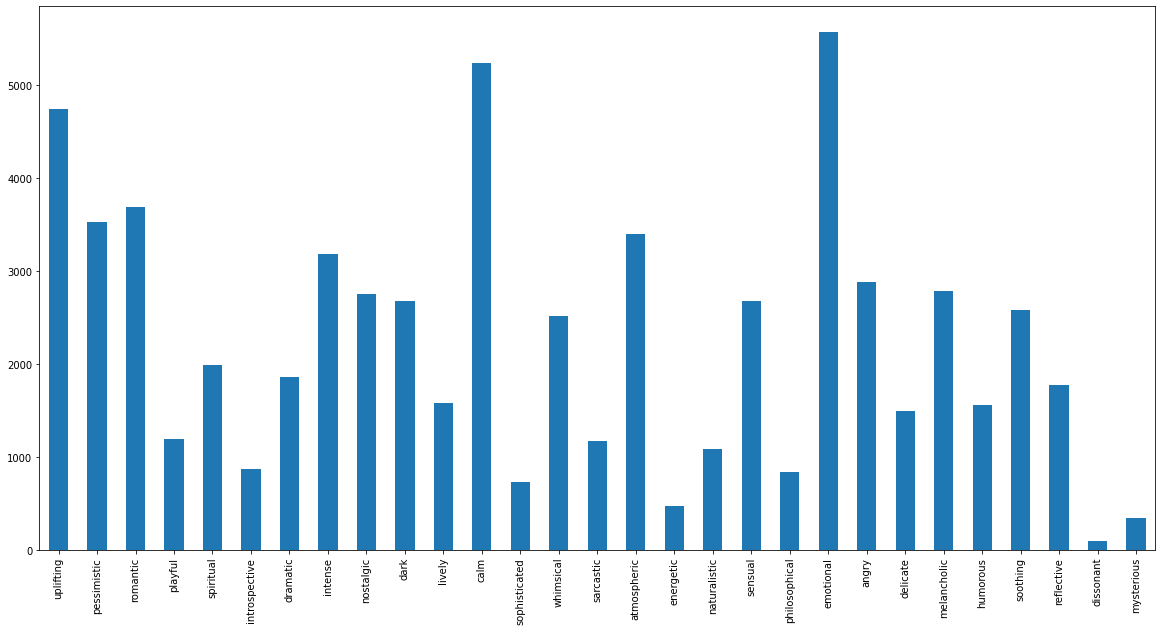

In [35]:
#bar plot of the number of songs in each emotion category
y_label_reduced_combined.sum(axis=0).plot(kind='bar', figsize=(20,10))


In [15]:
y_label_reduced_combined

,uplifting,pessimistic,romantic,playful,spiritual,introspective,dramatic,intense,nostalgic,dark,...,philosophical,emotional,angry,delicate,melancholic,humorous,soothing,reflective,dissonant,mysterious
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38953,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38954,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38955,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38956,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
#to csv
y_label_reduced_combined.to_csv('y_label_categorized.csv')

In [17]:
rows_more_than_one = y_label_reduced_combined[y_label_reduced_combined.sum(axis=1) > 1]
rows_more_than_one

,uplifting,pessimistic,romantic,playful,spiritual,introspective,dramatic,intense,nostalgic,dark,...,philosophical,emotional,angry,delicate,melancholic,humorous,soothing,reflective,dissonant,mysterious
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38524,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
38525,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
38526,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
38527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [18]:
rows_more_than_one.sum(axis=1).sort_values(ascending=True)

0         2.0
19861     2.0
19862     2.0
19864     2.0
19865     2.0
         ... 
374      17.0
1548     17.0
1549     17.0
3294     17.0
1555     19.0
Length: 17200, dtype: float64

In [19]:
y_label_reduced_combined

,uplifting,pessimistic,romantic,playful,spiritual,introspective,dramatic,intense,nostalgic,dark,...,philosophical,emotional,angry,delicate,melancholic,humorous,soothing,reflective,dissonant,mysterious
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38953,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38954,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38955,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38956,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
for i in range(0, len(rows_more_than_one)):
    #column names where value is 1
    columns = rows_more_than_one.iloc[i][rows_more_than_one.iloc[i] == 1].index
    #print(columns)
    #pick one column at random
    random_column = np.random.choice(columns)
    print(random_column)
    rows_more_than_one.iloc[i][random_column] = 1.0
    #set all other columns to 0
    columns = columns.drop(random_column)
    rows_more_than_one.iloc[i][columns] = 0.0

    #set row in y_label_reduced_combined to rows_more_than_one
    y_label_reduced_combined.iloc[i] = rows_more_than_one.iloc[i]


rows_more_than_one.sum(axis=1).sort_values(ascending=True)


intense
angry
angry
angry
intense
angry
angry
emotional
melancholic
intense
intense
intense
intense
lively
intense
angry
emotional
angry
intense
pessimistic
intense
intense
angry
angry
intense
calm
intense
intense
intense
intense
angry
intense
intense
angry
uplifting
intense
intense
naturalistic
angry
angry
calm
intense
angry
uplifting
angry
intense
intense
pessimistic
intense
angry
angry
emotional
intense
emotional
intense
angry
intense
intense
angry
intense
dark
intense
intense
angry
intense
angry
intense
angry
angry
intense
angry
sensual
sarcastic
angry
intense
intense
angry
intense
intense
angry
intense
angry
intense
intense
reflective
melancholic
angry
angry
intense
intense
intense
emotional
intense
angry
angry
intense
whimsical
angry
angry
angry
angry
angry
dramatic
angry
intense
angry
intense
intense
intense
angry
intense
angry
angry
angry
angry
whimsical
angry
intense
angry
intense
intense
angry
intense
angry
intense
intense
angry
angry
angry
intense
emotional
intense
emotional

KeyboardInterrupt: 

In [ ]:
y_label_reduced_combined

,uplifting,pessimistic,romantic,playful,spiritual,introspective,dramatic,intense,nostalgic,dark,...,philosophical,emotional,angry,delicate,melancholic,humorous,soothing,reflective,dissonant,mysterious
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14079,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
14080,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
14081,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
14082,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#sum of each column in y_label_reduced_combined
y_label_reduced_combined.sum(axis=0).sort_values(ascending=False)


emotional        1394.0
pessimistic      1083.0
romantic         1031.0
calm              961.0
angry             860.0
humorous          831.0
melancholic       829.0
delicate          701.0
whimsical         691.0
dramatic          670.0
uplifting         663.0
playful           639.0
nostalgic         636.0
reflective        630.0
soothing          619.0
dark              558.0
intense           527.0
sarcastic         460.0
atmospheric       444.0
naturalistic      372.0
spiritual         341.0
lively            339.0
sensual           302.0
philosophical     272.0
introspective     238.0
energetic         217.0
sophisticated     170.0
mysterious        134.0
dissonant          34.0
dtype: float64

In [ ]:
for i in range(0, len(y_label_reduced_combined)):
    #column names where value is 1
    columns = y_label_reduced_combined.iloc[i][y_label_reduced_combined.iloc[i] == 1].index
    #if empty, skip
    if len(columns) == 0:
        continue
    #print(columns)
    #pick one column at random
    random_column = np.random.choice(columns)

    print(random_column)
    y_label_reduced_combined.iloc[i][random_column] = 1.0
    #set all other columns to 0
    columns = columns.drop(random_column)
    y_label_reduced_combined.iloc[i][columns] = 0.0


sarcastic
sarcastic
humorous
whimsical
sarcastic
humorous
humorous
humorous
humorous
sarcastic
whimsical
humorous
humorous
humorous
sarcastic
sarcastic
sarcastic
humorous
sarcastic
sarcastic
humorous
humorous
sarcastic
sarcastic
humorous
sarcastic
sarcastic
dark
dramatic
nostalgic
sarcastic
sarcastic
humorous
humorous
sarcastic
humorous
humorous
humorous
playful
sarcastic
humorous
humorous
humorous
humorous
humorous
humorous
sarcastic
uplifting
dramatic
sarcastic
sarcastic
sarcastic
humorous
angry
emotional
humorous
sarcastic
sarcastic
humorous
sarcastic
introspective
humorous
sarcastic
humorous
humorous
sarcastic
humorous
humorous
humorous
humorous
humorous
emotional
sarcastic
sarcastic
humorous
humorous
humorous
delicate
sarcastic
sarcastic
sarcastic
spiritual
humorous
humorous
humorous
humorous
humorous
sarcastic
atmospheric
humorous
sarcastic
humorous
humorous
humorous
humorous
emotional
sarcastic
humorous
sarcastic
humorous
humorous
emotional
naturalistic
sophisticated
energetic
e

In [ ]:
#sum of each column in y_label_reduced_combined
y_label_reduced_combined.sum(axis=1).sort_values(ascending=False)

#how many rows are 0?
y_label_reduced_combined[y_label_reduced_combined.sum(axis=1) == 0].shape


(1458, 29)

In [ ]:
#to csv 
y_label_reduced_combined.to_csv('y_label_categorized_reduced_one_label.csv')